Source:
https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Monthly-counts-per-hour/b2ak-trbp

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Pedestrians.csv", thousands = ",")
df.index = df.Date_Time.astype('datetime64')
df2 = df.drop_duplicates(subset = 'Date_Time', keep = False)

In [3]:
del df2['Sensor_ID']
del df2['Sensor_Name']
del df2['ID']
del df2['Date_Time']

In [4]:
df2.sort_index(inplace=True)

c:\Users\wh\anaconda3_python\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


<AxesSubplot:xlabel='Date_Time', ylabel='Hourly_Counts'>

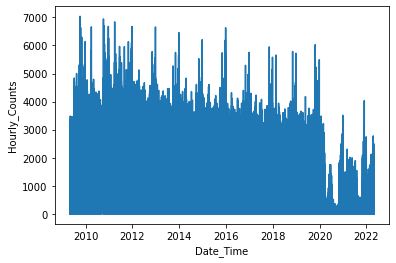

In [5]:
sns.lineplot(x=df2.index, y='Hourly_Counts', data=df2)

In [6]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52
2009-05-01 01:00:00,2009,May,1,Friday,1,34
2009-05-01 02:00:00,2009,May,1,Friday,2,19
2009-05-01 03:00:00,2009,May,1,Friday,3,14
2009-05-01 04:00:00,2009,May,1,Friday,4,15


In [7]:
df2.tail()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2022-04-30 19:00:00,2022,April,30,Saturday,19,489
2022-04-30 20:00:00,2022,April,30,Saturday,20,403
2022-04-30 21:00:00,2022,April,30,Saturday,21,310
2022-04-30 22:00:00,2022,April,30,Saturday,22,445
2022-04-30 23:00:00,2022,April,30,Saturday,23,244


In [8]:
import statsmodels.formula.api as sm

In [9]:
df2['Trend'] = range(1,len(df2)+1)

C:\Users\wh\AppData\Local\Temp/ipykernel_27972/2290489968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Trend'] = range(1,len(df2)+1)


In [10]:
df2['LogPed'] = np.log(df2.Hourly_Counts+1)

C:\Users\wh\AppData\Local\Temp/ipykernel_27972/648830483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPed'] = np.log(df2.Hourly_Counts+1)


In [11]:
df2_in = df2[df2.index <= "2019-12-31"]

In [12]:
model = sm.ols(formula="LogPed ~ Trend + C(Month) + C(Day) + C(Time)", data=df2_in)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LogPed   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.088e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:30:38   Log-Likelihood:                -78716.
No. Observations:               92540   AIC:                         1.575e+05
Df Residuals:                   92498   BIC:                         1.579e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.7090      0.012    377.045      0.000       4.685       4.734
C(Month)[T.August]       -0.1836      0.009    -20.055      0.000      -0.202      -0.166
C(Month)[T.December]      0.2797      0.009     30.526      0.000       0.262       0.298
C(Month)[T.February]      0.0013      0.010      0.139      0.890      -0.017       0.020
C(Month)[T.January]      -0.0337      0.009     -3.598      0.000      -0.052      -0.015
C(Month)[T.July]         -0.1044      0.009    -11.400      0.000      -0.122      -0.086
C(Month)[T.June]         -0.1382      0.009    -14.981      0.000      -0.156      -0.120
C(Month)[T.March]         0.0082      0.009      0.878      0.380      -0.010       0.027
C(Month)[T.May]          -0.1393      0.009    -15.208      0.000      -0.157      -0.121
C(Month)[T.November]      0.0480      0.009      5.201      0.000       0.030       0.066
C(Month)[T.October]      -0.0879      0.009     -9.534      0.000      -0.106      -0.070
C(Month)[T.September]    -0.1385      0.009    -14.658      0.000      -0.157      -0.120
C(Day)[T.Monday]         -0.4196      0.007    -60.273      0.000      -0.433      -0.406
C(Day)[T.Saturday]       -0.0079      0.007     -1.136      0.256      -0.022       0.006
C(Day)[T.Sunday]         -0.2160      0.007    -31.024      0.000      -0.230      -0.202
C(Day)[T.Thursday]       -0.2361      0.007    -33.866      0.000      -0.250      -0.222
C(Day)[T.Tuesday]        -0.4255      0.007    -61.072      0.000      -0.439      -0.412
C(Day)[T.Wednesday]      -0.3539      0.007    -50.762      0.000      -0.368      -0.340
C(Time)[T.1]             -0.4888      0.013    -37.882      0.000      -0.514      -0.464
C(Time)[T.2]             -0.9305      0.013    -72.093      0.000      -0.956      -0.905
C(Time)[T.3]             -1.1425      0.013    -88.543      0.000      -1.168      -1.117
C(Time)[T.4]             -1.3145      0.013   -101.875      0.000      -1.340      -1.289
C(Time)[T.5]             -1.0565      0.013    -81.882      0.000      -1.082      -1.031
C(Time)[T.6]             -0.0963      0.013     -7.461      0.000      -0.122      -0.071
C(Time)[T.7]              0.8692      0.013     67.364      0.000       0.844       0.894
C(Time)[T.8]              1.7797      0.013    137.928      0.000       1.754       1.805
C(Time)[T.9]              2.2579      0.013    174.985      0.000       2.233       2.283
C(Time)[T.10]             2.7820      0.013    215.605      0.000       2.757       2.807
C(Time)[T.11]             3.1748      0.013    246.047      0.000       3.149       3.200
C(Time)[T.12]             3.6149      0.013    280.158      0.000       3.590       3.640
C(Time)[T.13]             3.7303      0.013    289.096      0.000       3.705       3.756
C(Time)[T.14]          

In [13]:
df2['LogPasFC'] = results.predict(df2)

C:\Users\wh\AppData\Local\Temp/ipykernel_27972/1561756521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPasFC'] = results.predict(df2)


In [14]:
df2['PedestriansFC'] = np.exp(df2.LogPasFC)-1

C:\Users\wh\AppData\Local\Temp/ipykernel_27972/1925649351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PedestriansFC'] = np.exp(df2.LogPasFC)-1


In [15]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPasFC,PedestriansFC
Date_Time,,,,,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52,1,3.970292,4.569740,95.519017
2009-05-01 01:00:00,2009,May,1,Friday,1,34,2,3.555348,4.080939,58.201060
2009-05-01 02:00:00,2009,May,1,Friday,2,19,3,2.995732,3.639201,37.061420
2009-05-01 03:00:00,2009,May,1,Friday,3,14,4,2.708050,3.427251,29.791868
2009-05-01 04:00:00,2009,May,1,Friday,4,15,5,2.772589,3.255231,24.925594


<AxesSubplot:xlabel='Date_Time'>

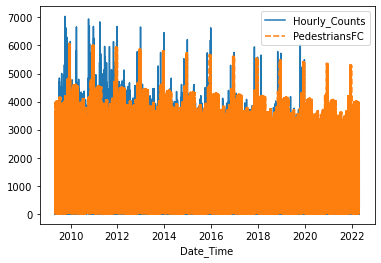

In [16]:
dfplot = df2.filter(['Hourly_Counts', 'PedestriansFC'])
sns.lineplot(data=dfplot)